In [238]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nbimporter

In [239]:
import importlib
import capstone_McLean

In [240]:
# Load CSV file
df = pd.read_csv('C:\\Users\seanm\Downloads\Electric_Vehicle_Population_Data.csv')

# Display the first few rows of the dataframe
print(df.head())

   VIN (1-10)    County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P    Kitsap    Seabeck    WA      98380.0        2023     TOYOTA   
1  1N4AZ1CP6J    Kitsap  Bremerton    WA      98312.0        2018     NISSAN   
2  5YJ3E1EA4L      King    Seattle    WA      98101.0        2020      TESLA   
3  1N4AZ0CP8E      King    Seattle    WA      98125.0        2014     NISSAN   
4  1G1FX6S00H  Thurston       Yelm    WA      98597.0        2017  CHEVROLET   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        LEAF          Battery Electric Vehicle (BEV)   
2     MODEL 3          Battery Electric Vehicle (BEV)   
3        LEAF          Battery Electric Vehicle (BEV)   
4     BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel

#B. Exploratory Data Analysis

In [242]:
#Basic descriptive statistics for numerical columns
print(df.describe())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  205436.000000  205439.000000   205431.000000  205431.000000   
mean    98177.971870    2020.960363       52.164342     922.670532   
std      2419.037479       2.989059       88.075859    7761.753602   
min      1731.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98372.000000    2023.000000       48.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         204997.000000    2.054390e+05       2.054360e+05  
mean              28.970848    2.277156e+08       5.297704e+10  
std               14.910052    7.205737e+07       1.588435e+09  
min                1.000000    4.469000e+03       1.001020e+09  
25%               17.000000    1.935324e+08 

In [243]:
# Descriptive statistics for both numerical and categorical columns
print(df.describe(include='all'))

        VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       205439  205436   205436  205439  205436.000000  205439.000000   
unique       12140     205      770      45            NaN            NaN   
top     7SAYGDEE6P    King  Seattle      WA            NaN            NaN   
freq          1221  105237    33328  204997            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98177.971870    2020.960363   
std            NaN     NaN      NaN     NaN    2419.037479       2.989059   
min            NaN     NaN      NaN     NaN    1731.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2019.000000   
50%            NaN     NaN      NaN     NaN   98125.000000    2022.000000   
75%            NaN     NaN      NaN     NaN   98372.000000    2023.000000   
max            NaN     NaN      NaN     NaN   99577.000000    2025.000000   

          Make    Model           Electric Vehicle Type  \
count   205439  

In [244]:
# Number of missing values per column
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [245]:
# Separate numerical and categorical columns
#Reference: https://stackoverflow.com/questions/58075048/separate-numerical-and-categorical-variable-in-pandas-datframe
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')
Categorical columns: Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


In [246]:
# Fill missing values for numerical columns with 0
df[numerical_cols] = df[numerical_cols].fillna(0)

# Fill missing values for categorical columns with 'NA'
df[categorical_cols] = df[categorical_cols].fillna('NA')

In [247]:
# Check if any missing values remain
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [248]:
# Dropping specific columns
columns_to_drop = ['VIN (1-10)', 'Vehicle Location']  

# The drop method
df_1 = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the columns
print("\nDataFrame after dropping columns:")
print(df_1.head())


DataFrame after dropping columns:
     County       City State  Postal Code  Model Year       Make       Model  \
0    Kitsap    Seabeck    WA      98380.0        2023     TOYOTA  RAV4 PRIME   
1    Kitsap  Bremerton    WA      98312.0        2018     NISSAN        LEAF   
2      King    Seattle    WA      98101.0        2020      TESLA     MODEL 3   
3      King    Seattle    WA      98125.0        2014     NISSAN        LEAF   
4  Thurston       Yelm    WA      98597.0        2017  CHEVROLET     BOLT EV   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1          Battery Electric Vehicle (BEV)   
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel Vehicle Eligible           151.0   


C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


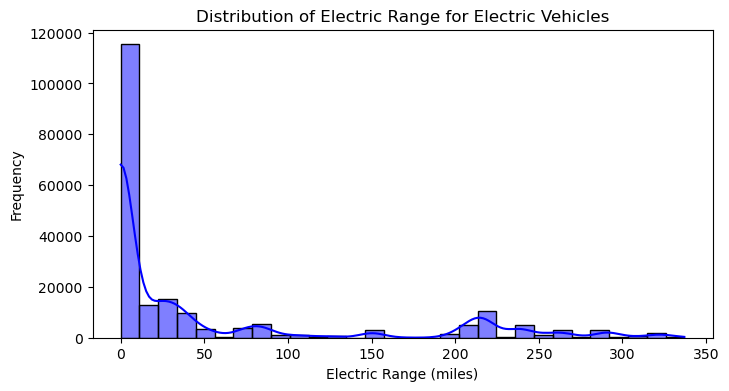

In [249]:
#Data visualization - Histogram
#Reference: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
plt.figure(figsize=(8, 4))
sns.histplot(df_1['Electric Range'], kde=True, bins=30, color='blue')
plt.title('Distribution of Electric Range for Electric Vehicles')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

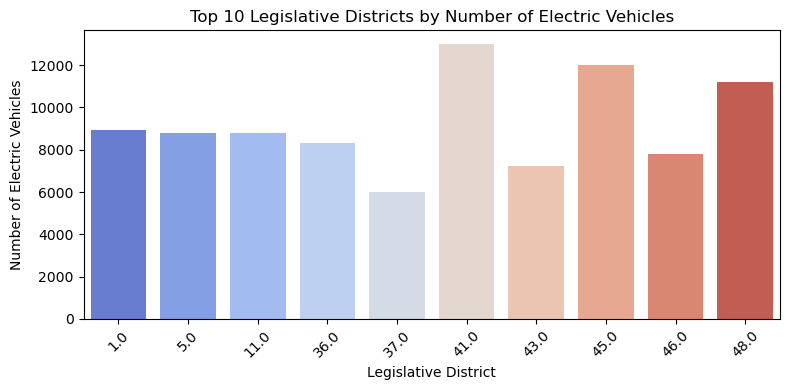

In [250]:
#Data visualization - Bar Chart of the Count of Electric Vehicles by Legislative District
ev_by_district = df_1['Legislative District'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=ev_by_district.index, y=ev_by_district.values, palette='coolwarm')
plt.title('Top 10 Legislative Districts by Number of Electric Vehicles')
plt.xlabel('Legislative District')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

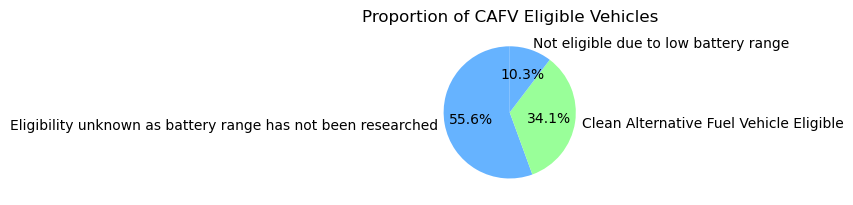

In [251]:
# Data visualization - Pie chart of CAFV Eligibility
cafv_pie = df_1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cafv_pie, labels=cafv_pie.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proportion of CAFV Eligible Vehicles')
plt.tight_layout()
plt.show()

#C. Predictive Models (Statistical/Predictive Analysis)

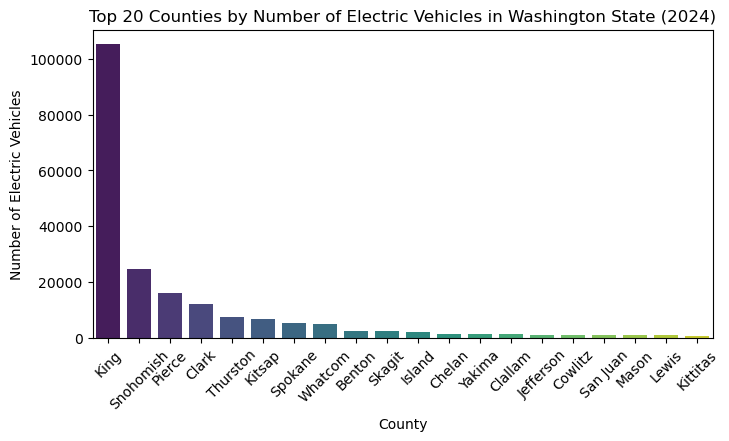

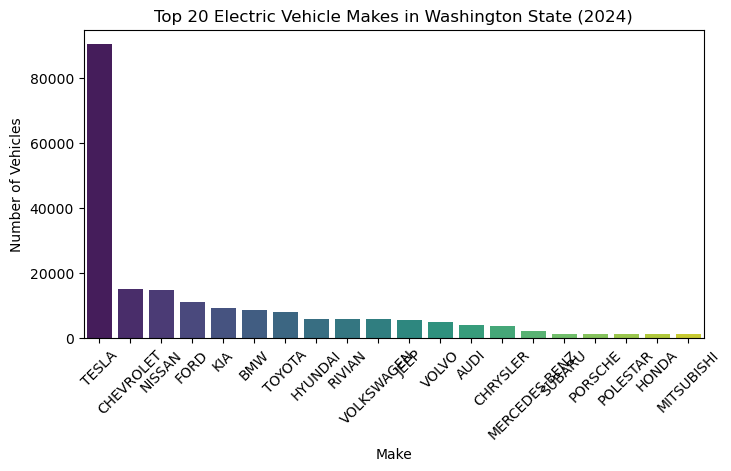

In [253]:
#Descriptive Statistics & Data Visualization(Bar Charts)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 counties by number of EVs
top_ev_by_county = df_1['County'].value_counts().head(20)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_ev_by_county.index, y=top_ev_by_county.values, palette='viridis')
plt.title('Top 20 Counties by Number of Electric Vehicles in Washington State (2024)')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()

# Most common electric vehicle makes and models
popular_makes = df_1['Make'].value_counts().head(20)

plt.figure(figsize=(8, 4))
sns.barplot(x=popular_makes.index, y=popular_makes.values, palette='viridis')
plt.title('Top 20 Electric Vehicle Makes in Washington State (2024)')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

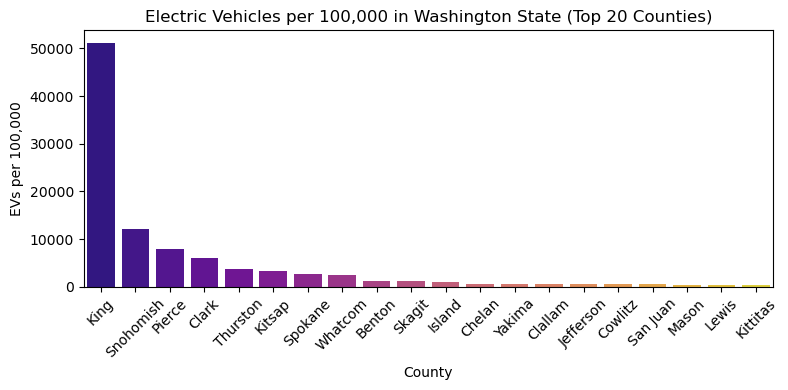

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of EVs by county (number of rows per county)
ev_by_county = df_1['County'].value_counts().reset_index()
ev_by_county.columns = ['County', 'EV_Count']

# Calculate the total number of EVs in the dataset
total_evs = ev_by_county['EV_Count'].sum()

# Calculate EVs per "capita" based on the total number of EVs in the dataset
ev_by_county['EVs_per_100k'] = (ev_by_county['EV_Count'] / total_evs) * 100000

# Sort the DataFrame to get the top 10 counties by EVs per capita
top_20_counties_per_capita = ev_by_county.sort_values('EVs_per_100k', ascending=False).head(20)

# Plot the results
plt.figure(figsize=(8, 4))
sns.barplot(x=top_20_counties_per_capita['County'], y=top_20_counties_per_capita['EVs_per_100k'], palette='plasma')
plt.title('Electric Vehicles per 100,000 in Washington State (Top 20 Counties)')
plt.xlabel('County')
plt.ylabel('EVs per 100,000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [255]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


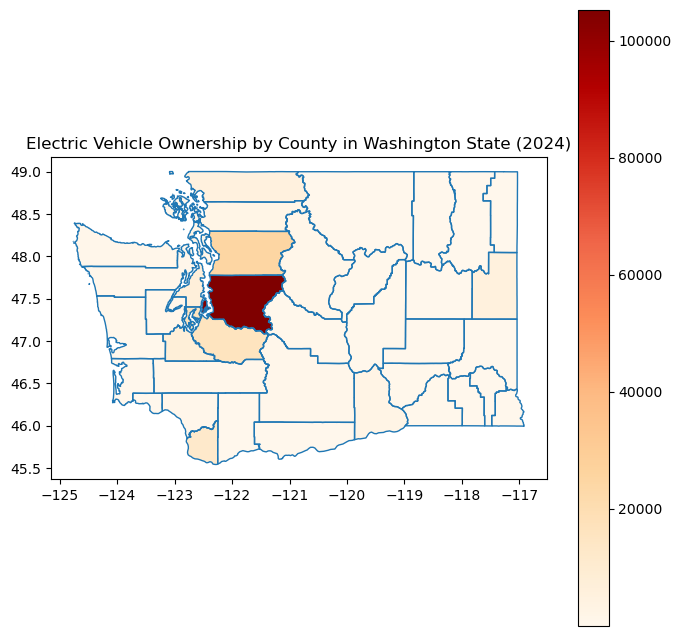

In [256]:
#Geospatial Analysis
import matplotlib.pyplot as plt
import geopandas as gpd
#Reference: https://www.geeksforgeeks.org/visualizing-geospatial-data-using-folium-in-python/

# Load geospatial data
gdf_counties = gpd.read_file('C:\\Users\seanm\Downloads\washington-state-counties_.geojson')  # Replace with the path to your shapefile

# Aggregate EV data by county
ev_counts = df_1['County'].value_counts().reset_index()
ev_counts.columns = ['County', 'EV_Count']

# Merge with geospatial data
gdf_counties = gdf_counties.merge(ev_counts, left_on='NAME', right_on='County', how='left')

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
gdf_counties.boundary.plot(ax=ax, linewidth=1)
gdf_counties.plot(column='EV_Count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Electric Vehicle Ownership by County in Washington State (2024)')
plt.show()

In [257]:
#Generalized Linear Model Regression
import pandas as pd
import statsmodels.api as sm
#Reference: https://github.com/paulinamoskwa/GLMs

# Step 1: Prepare the Data
# Convert categorical variables to 'category'
df_1['Make'] = df_1['Make'].astype('category')
df_1['Model'] = df_1['Model'].astype('category')

# Step 2: Define dependent and independent variables
# Here we are using 'Base MSRP' as the dependent variable
# and 'Make' and 'Model' as independent variables
X = pd.get_dummies(df_1[['Make', 'Model']], drop_first=True)  # Use dummies for categorical variables
y = df_1['Electric Range']  # Dependent variable

# Step 3: Fit the Generalized Linear Model (Gaussian family)
model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Step 4: Print the summary of the model
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Electric Range   No. Observations:               205439
Model:                            GLM   Df Residuals:                   205285
Model Family:                Gaussian   Df Model:                          153
Link Function:               Identity   Scale:                          4996.6
Method:                          IRLS   Log-Likelihood:            -1.1663e+06
Date:                Sat, 26 Oct 2024   Deviance:                   1.0259e+09
Time:                        23:55:51   Pearson chi2:                 1.03e+09
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4248
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Make_ALFA RO

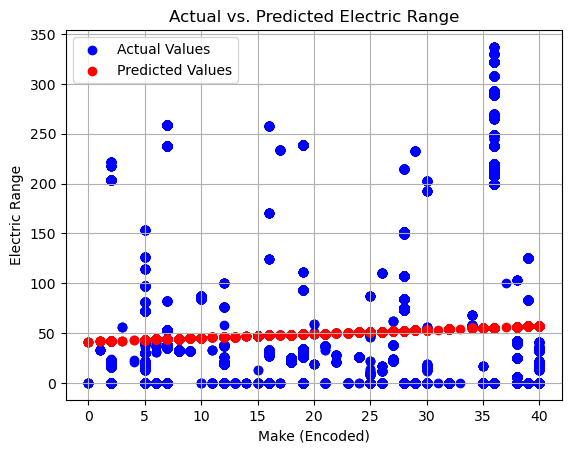

In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Strip whitespace from column names
df_1.columns = df_1.columns.str.strip()

# Keep only relevant columns and drop rows with missing values
df_1 = df_1[['Electric Range', 'Make']].dropna()

# Convert categorical variable 'Make' to numeric
df_1['Make'] = df_1['Make'].astype('category').cat.codes

# Define features and target variable
X = df_1[['Make']]  # Predictor
y = df_1['Electric Range']  # Response variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual Values')  # Actual values
plt.scatter(X_test, predictions, color='red', label='Predicted Values')  # Predicted values
plt.xlabel('Make (Encoded)')
plt.ylabel('Electric Range')
plt.title('Actual vs. Predicted Electric Range')
plt.legend()
plt.grid()
plt.show()